<a href="https://colab.research.google.com/github/dhirajsuvarna/nlp_text_classification/blob/master/learning/NLP_XLNet_IMDB_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.text import *

Get the data of IMDB 

In [0]:
print(f"imdb sample path: {URLs.IMDB_SAMPLE}")
path = untar_data(URLs.IMDB_SAMPLE)
print(f"path:{path}")

path:/root/.fastai/data/imdb_sample


In [0]:
df = pd.read_csv(path/'texts.csv')
df.head(5)
# df.count()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [0]:
data_lm = TextLMDataBunch.from_csv(path, 'texts.csv')
print(type(data_lm))
# print(data_lm)
data_lm.save('data_lm_export.pkl')


<class 'fastai.text.data.TextLMDataBunch'>


In [0]:
bs=64

In [0]:
data_lm = load_data(path, 'data_lm_export.pkl', bs=bs)


In [0]:
#torch.cuda.set_device(1)

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)
learn.fit_one_cycle(1, slice(1e-4))
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-4,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,4.483100,4.188595,0.261575,00:22


epoch,train_loss,valid_loss,accuracy,time
0,4.246778,3.896880,0.286001,00:28
1,3.896992,3.847209,0.288536,00:28
2,3.496902,3.844581,0.286942,00:28


In [0]:
learn.predict("this movie sucks big time", n_words=25)

'this movie sucks big time and makes a lot of mistakes but it shows the testament of an unhappy husband who normally places her topless down straight under her eyes'

In [0]:
learn.save('ft')
learn.save_encoder('ft_enc')

In [0]:
#print(data_lm.train_ds.vocab)
print(data_lm.vocab.itos)

['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep', 'the', ',', '.', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'that', 'this', '"', "'s", '-', '\n \n ', 'was', 'for', 'as', 'movie', 'with', 'but', 'film', 'you', ')', "n't", '(', 'on', 'are', 'not', 'he', 'his', 'be', 'have', 'one', 'they', 'at', 'all', 'by', 'an', 'from', 'so', 'like', '!', 'who', 'there', 'just', 'if', 'or', 'about', 'out', 'do', 'her', 'some', "'", 'what', 'has', '?', 'more', 'up', 'good', 'very', 'no', 'when', 'she', 'would', 'their', 'were', 'really', 'even', 'can', 'time', 'only', 'my', 'which', 'story', 'had', 'see', 'did', 'we', 'into', 'does', ':', 'me', 'well', 'than', 'will', 'get', 'also', 'much', 'bad', 'people', 'because', 'other', 'could', '...', 'how', 'make', 'any', 'first', 'its', 'most', 'two', 'then', 'been', 'made', 'great', 'way', 'too', 'them', 'after', 'acting', 'watch', 'him', '/', 'think', 'movies', 'never', 'little', 'films', 'where', 'plot', ';', 'character'

In [0]:
data_clas = TextClasDataBunch.from_csv(path, 'texts.csv', vocab=data_lm.train_ds.vocab, bs=32)
print(type(data_clas))
# print(data_clas)
data_clas.save('data_clas_export.pkl')

data_clas = load_data(path, 'data_clas_export.pkl', bs=bs)
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5).to_fp16()
learn.load_encoder('ft_enc')

In [0]:
# data_clas.show_batch()

In [0]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.620744,0.597760,0.820895,00:18


In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.462576,0.443907,0.825871,00:42
1,0.388602,0.332138,0.875622,00:42
2,0.334504,0.313989,0.865672,00:45


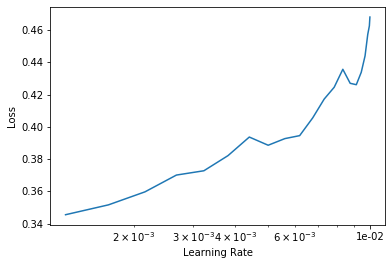

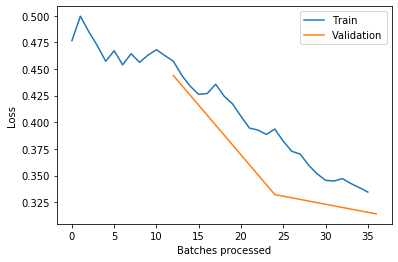

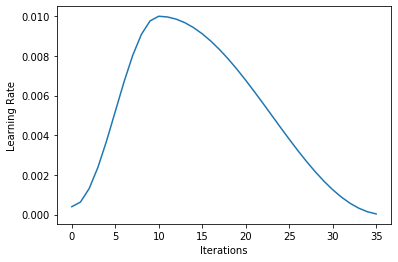

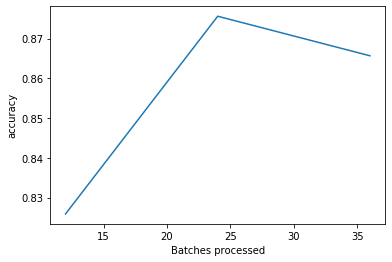

In [0]:
#Plot the error curves
learn.recorder.plot()
learn.recorder.plot_losses()
learn.recorder.plot_lr()
learn.recorder.plot_metrics()

In [0]:
print(learn.data.classes) # to check the classes order considered 

['negative', 'positive']


In [0]:
from sklearn import metrics
predictions = learn.get_preds()
predictions = np.argmax(predictions[0], axis = 1) 
target = predictions[1]
print (f"predict:{predictions}")
print(f"target:{targets}")
confusion_matrix = metrics.confusion_matrix(targets, predictions)
print(confusion_matrix)
target_names = ['Negative Review', 'Positive Review']
print(metrics.classification_report(targets, predictions, target_names=target_names))

predict:tensor([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 0, 1, 1, 1])
target:tensor([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1

In [0]:
learn.predict("This was a ok.")


(Category positive, tensor(1), tensor([0.3006, 0.6994]))

In [0]:
learn.predict("I didn't like the movie")


(Category negative, tensor(0), tensor([0.7981, 0.2019]))

In [0]:
learn.predict("The moive did not reach my expectation")


(Category positive, tensor(1), tensor([0.3464, 0.6536]))

In [0]:
learn.predict("audience were laughing and screaming throughout")

(Category negative, tensor(0), tensor([0.9306, 0.0694]))

In [0]:
learn.predict("the movie was not good!")

(Category positive, tensor(1), tensor([0.4820, 0.5180]))

In [0]:
learn.predict("This plot of the movie was confusing which left the audience bored")

(Category negative, tensor(0), tensor([0.8894, 0.1106]))

In [0]:
# from fastai.vision import *
# preds, y, losses = learn.get_preds(with_loss=True)
# interp = ClassificationInterpretation(data_clas, preds, y, losses)

targetlist= [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 1, 0]
print(len(targetlist))

201
